In [2]:
import numpy as np
import pandas as pd
import os
import random

In [4]:
uber = pd.read_csv('uber.csv')
uber.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
uber.shape

(200000, 9)

In [4]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
uber.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


## Data Cleaning and EDA

In [5]:
#check for null values
uber.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
uber_clean = uber.drop(['Unnamed: 0', 'key'],axis = 1)
uber_clean.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
#drop all the null values
uber_clean.dropna(axis =0, inplace = True)

In [8]:
uber_clean.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [9]:
uber_clean.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
def haversine (lon_1, lon_2, lat_1, lat_2):
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 +
                                      np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))
    return km

In [11]:
uber_clean['Distance']= haversine(uber_clean['pickup_longitude'],uber_clean['dropoff_longitude'],
                             uber_clean['pickup_latitude'],uber_clean['dropoff_latitude'])

uber_clean['Distance'] = uber_clean['Distance'].astype(float).round(2)

In [12]:
uber_clean.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.48


In [13]:
uber_clean.corr(method='pearson', numeric_only=True)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
fare_amount,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010158,0.024684
pickup_longitude,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000415,0.105581
pickup_latitude,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001559,-0.062436
dropoff_longitude,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033,0.056717
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659,-0.079944
passenger_count,0.010158,-0.000415,-0.001559,0.000033,-0.000659,1.000000,-0.001472
Distance,0.024684,0.105581,-0.062436,0.056717,-0.079944,-0.001472,1.000000


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

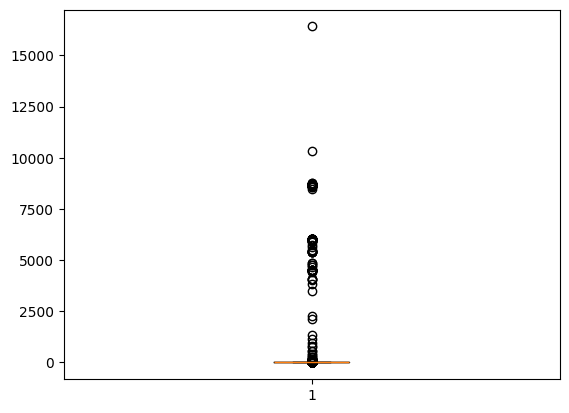

<Figure size 100x200 with 0 Axes>

In [15]:
ax1, ax = plt.subplots()
dis = uber_clean['Distance']
ax.boxplot(dis)
plt.figure(figsize=(1, 2))
plt.show()

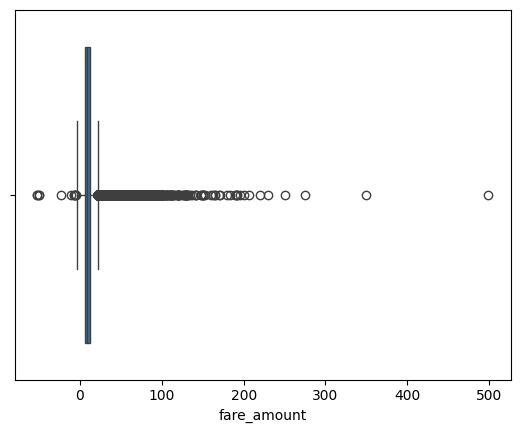

In [18]:
sns.boxplot(data=uber_clean, x='fare_amount')
plt.show()

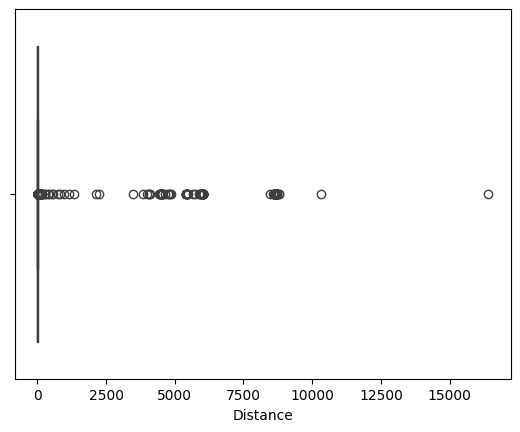

In [170]:
sns.boxplot(data=uber_clean, x='Distance')
plt.show()

Text(0, 0.5, 'fare_amount')

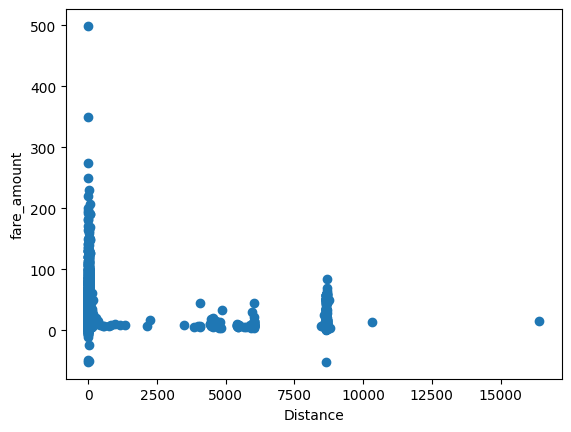

In [19]:
#scatter plot of distance vs fare
import matplotlib.pyplot as plt
plt.scatter(uber_clean['Distance'], uber_clean['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [16]:
# Remove outliers
uber_clean.drop(uber_clean[uber_clean['Distance'] > 5].index, inplace = True)
uber_clean.drop(uber_clean[uber_clean['Distance'] == 0].index, inplace = True)
uber_clean.drop(uber_clean[uber_clean['Distance'] < 0].index, inplace = True)

uber_clean.drop(uber_clean[uber_clean['fare_amount'] == 0].index, inplace = True)
uber_clean.drop(uber_clean[uber_clean['fare_amount'] < 0].index, inplace = True)
uber_clean.drop(uber_clean[uber_clean['Distance'] > 100].index, inplace = True)
uber_clean.drop(uber_clean[uber_clean['fare_amount'] > 16].index, inplace = True)
uber_clean.drop(uber_clean[(uber_clean['fare_amount']>100) & (uber_clean['Distance']<1)].index, inplace = True )
uber_clean.drop(uber_clean[(uber_clean['fare_amount']<100) & (uber_clean['Distance']>100)].index, inplace = True )

In [17]:
uber_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154311 entries, 0 to 199998
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        154311 non-null  float64
 1   pickup_datetime    154311 non-null  object 
 2   pickup_longitude   154311 non-null  float64
 3   pickup_latitude    154311 non-null  float64
 4   dropoff_longitude  154311 non-null  float64
 5   dropoff_latitude   154311 non-null  float64
 6   passenger_count    154311 non-null  int64  
 7   Distance           154311 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.6+ MB


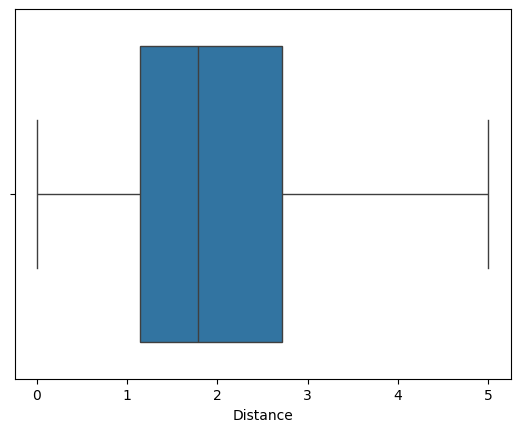

In [18]:
sns.boxplot(data=uber_clean, x='Distance')
plt.show()

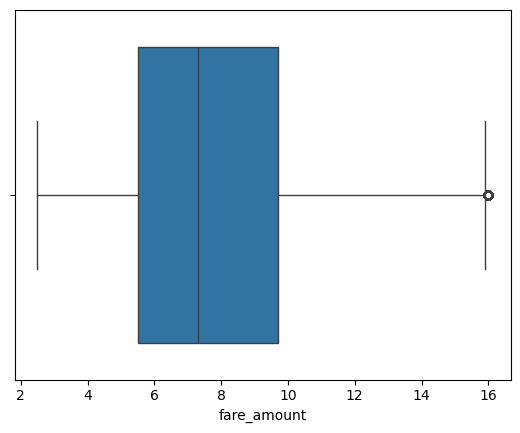

In [24]:
sns.boxplot(data=uber_clean, x='fare_amount')
plt.show()

Text(0, 0.5, 'fare_amount')

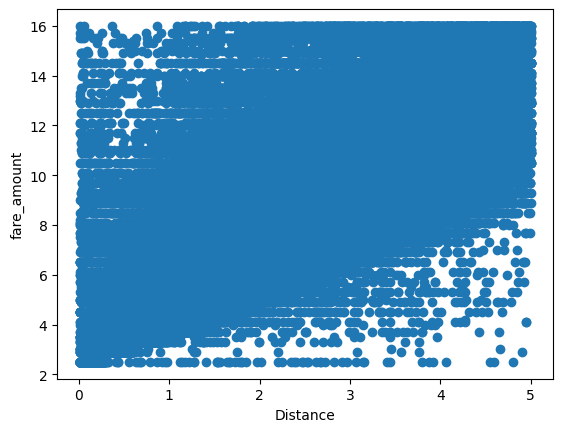

In [25]:
#if we re plot the scatter plot the change can be observed
plt.scatter(uber_clean['Distance'], uber_clean['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

<Axes: >

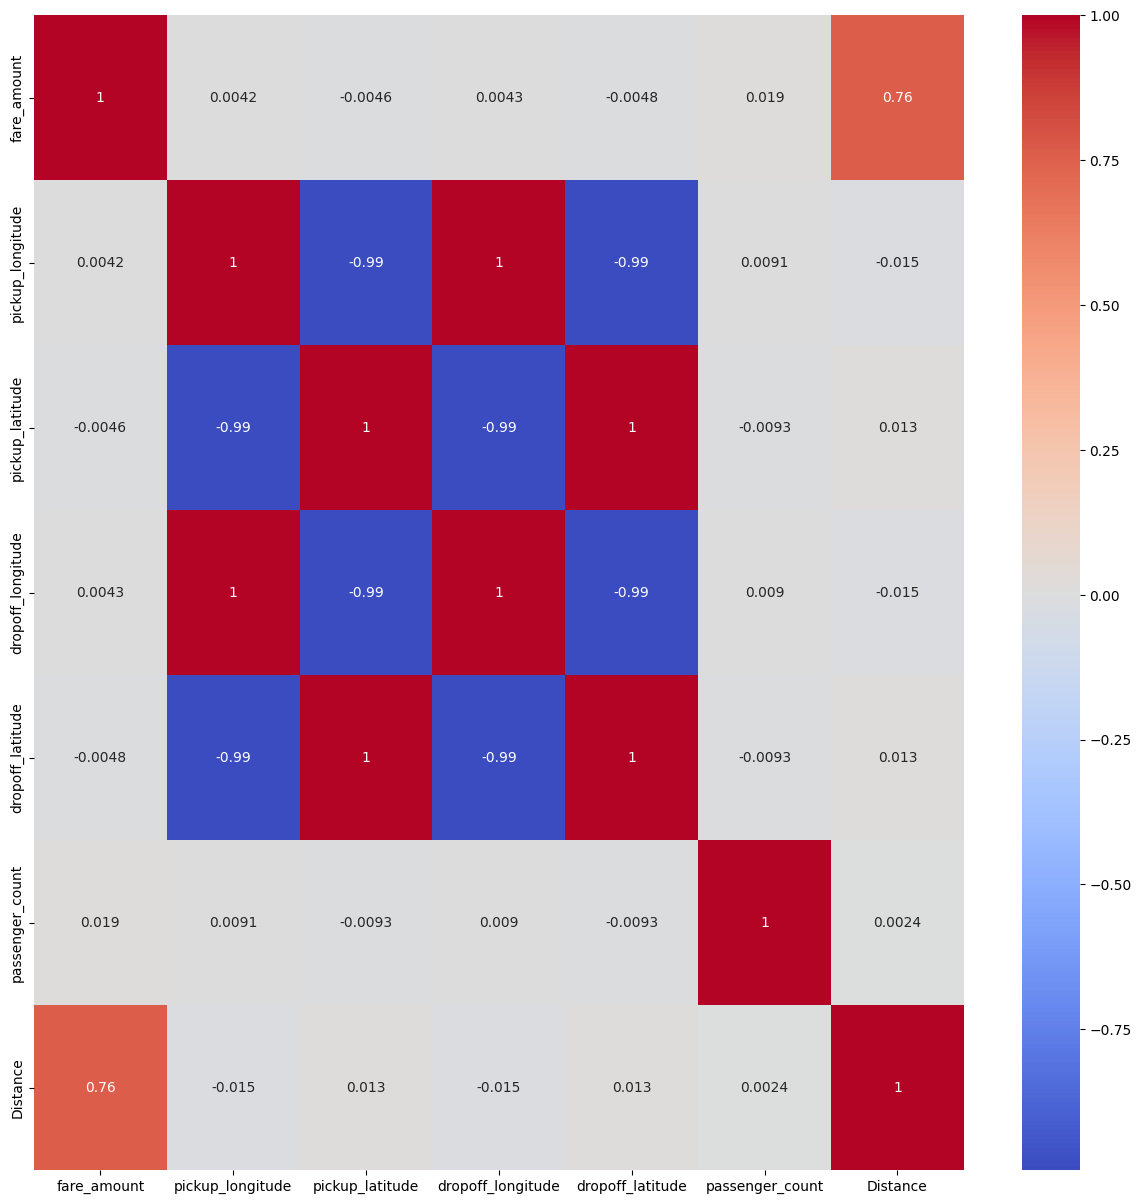

In [19]:
corr = uber_clean.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [18]:
# Extract date and time
uber_clean['pickup_datetime'] = pd.to_datetime(uber_clean['pickup_datetime'])

uber_clean['Year'] = uber_clean['pickup_datetime'].apply(lambda time: time.year)
uber_clean['Month'] = uber_clean['pickup_datetime'].apply(lambda time: time.month)
uber_clean['Day'] = uber_clean['pickup_datetime'].apply(lambda time: time.day)
uber_clean['Day of Week'] = uber_clean['pickup_datetime'].apply(lambda time: time.dayofweek)
uber_clean['Day of Week_num'] = uber_clean['pickup_datetime'].apply(lambda time: time.dayofweek)
uber_clean['Hour'] = uber_clean['pickup_datetime'].apply(lambda time: time.hour)

day_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
uber_clean['Day of Week'] = uber_clean['Day of Week'].map(day_map)

uber_clean['counter'] = 1

In [19]:
#seperate columns for pickup and dropoff for clear understanding of the data
uber_clean['pickup'] = uber_clean['pickup_latitude'].astype(str) + "," + uber_clean['pickup_longitude'].astype(str)
uber_clean['drop off'] = uber_clean['dropoff_latitude'].astype(str) + "," + uber_clean['dropoff_longitude'].astype(str)

In [20]:
uber_clean.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Day,Day of Week,Day of Week_num,Hour,counter,pickup,drop off
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.68,2015,5,7,Thu,3,19,1,"40.73835372924805,-73.99981689453125","40.72321701049805,-73.99951171875"
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.46,2009,7,17,Fri,4,20,1,"40.728225,-73.994355","40.750325,-73.99471"
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.66,2009,6,26,Fri,4,8,1,"40.790844,-73.976124","40.803349,-73.965316"
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.48,2014,8,28,Thu,3,17,1,"40.744085,-73.925023","40.761247,-73.97308199999999"
8,9.7,2012-02-17 09:32:00+00:00,-73.975187,40.745767,-74.002720,40.743537,1,2.33,2012,2,17,Fri,4,9,1,"40.745767,-73.975187","40.743537,-74.00272"
9,12.5,2012-03-29 19:06:00+00:00,-74.001065,40.741787,-73.963040,40.775012,1,4.89,2012,3,29,Thu,3,19,1,"40.741787,-74.001065","40.775012,-73.96304"
10,6.5,2015-05-22 17:32:27+00:00,-73.974388,40.746952,-73.988586,40.729805,1,2.25,2015,5,22,Fri,4,17,1,"40.74695205688477,-73.9743881225586","40.729804992675774,-73.98858642578125"
12,3.3,2011-05-17 14:03:00+00:00,-73.966378,40.804440,-73.965890,40.807133,5,0.30,2011,5,17,Tue,1,14,1,"40.80444,-73.966378","40.807133,-73.96589"
13,10.9,2011-06-25 11:19:00+00:00,-73.953352,40.767382,-73.972510,40.796137,1,3.58,2011,6,25,Sat,5,11,1,"40.767382,-73.953352","40.796137,-73.97251"
14,6.9,2010-04-06 22:20:27+00:00,-73.973370,40.755193,-73.978265,40.766375,1,1.31,2010,4,6,Tue,1,22,1,"40.755193,-73.97336999999999","40.766375,-73.97826500000001"


## Data Visualization

<BarContainer object of 7 artists>

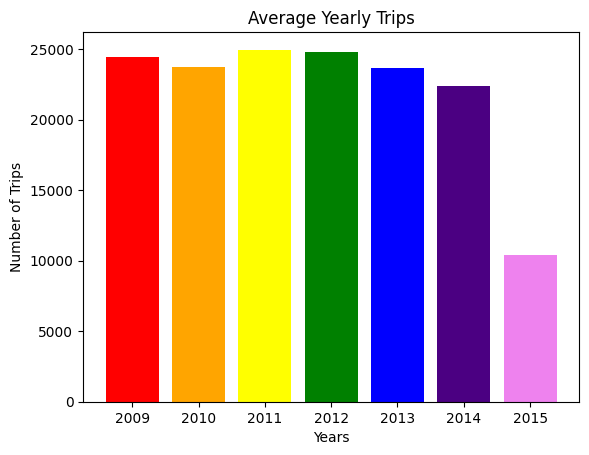

In [23]:
#needed to detect trends in the data to extract useful information for future predictions
trips = []
year = [2009, 2010, 2011, 2012, 2013, 2014, 2015]

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']

for i in range(2009, 2016):
    x = uber_clean.loc[uber_clean['Year'] == i, 'counter'].sum()
    trips.append(x)

plt.title("Average Yearly Trips")
plt.xlabel("Years")
plt.ylabel("Number of Trips")

plt.bar(year, trips, color=colors)

<BarContainer object of 12 artists>

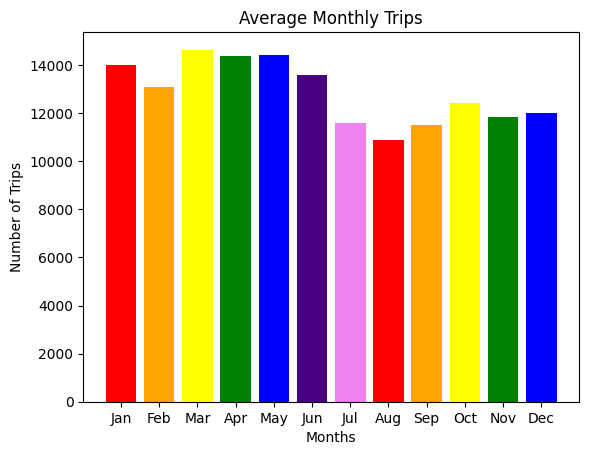

In [24]:
#monthly trips
trips = []
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']


for i in range(1, 13):
    x = uber_clean.loc[uber_clean['Month'] == i, 'counter'].sum()
    trips.append(x)


plt.title("Average Monthly Trips")
plt.xlabel("Months")
plt.ylabel("Number of Trips")

plt.bar(month, trips, color=colors)

<BarContainer object of 7 artists>

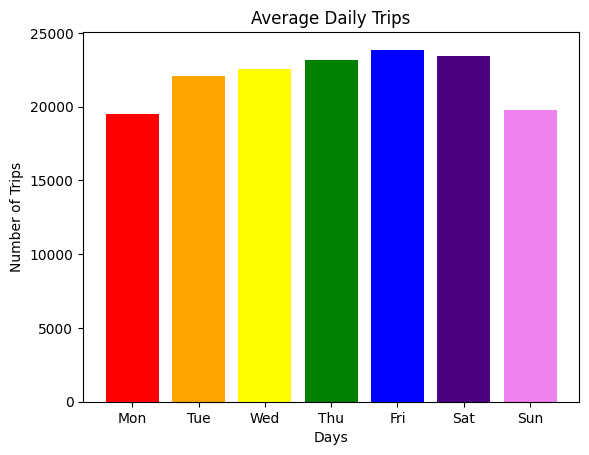

In [32]:
#Average Daily trips
trips = []
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']


for i in range(0, 7):
    x = uber_clean.loc[uber_clean['Day of Week_num'] == i, 'counter'].sum()
    trips.append(x)


plt.title("Average Daily Trips")
plt.xlabel("Days")
plt.ylabel("Number of Trips")

plt.bar(day, trips, color=colors)

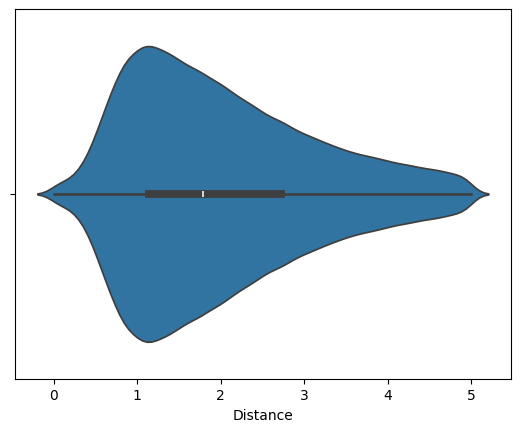

In [33]:
sns.violinplot(data=uber_clean, x='Distance')
plt.show()

<Axes: xlabel='fare_amount'>

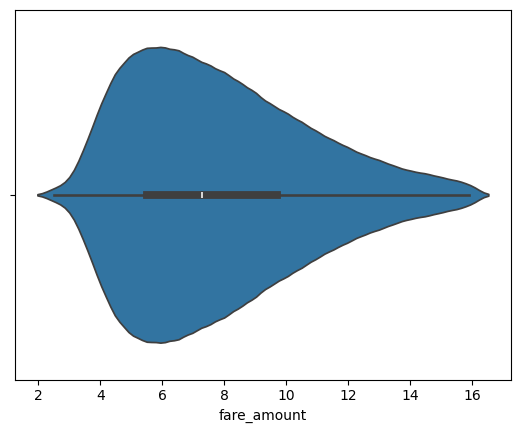

In [34]:
sns.violinplot(data=uber_clean, x='fare_amount')

In [22]:
year_vs_trips = uber_clean.groupby(['Year','Month']).agg(
    no_of_trips = ('counter','count'),
    Average_fair = ('fare_amount','mean'),
    Total_fair = ('fare_amount','sum'),
    Avg_distance = ( 'Distance', 'mean')).reset_index()

year_vs_trips['avg_no_of_trips'] = year_vs_trips['no_of_trips']/30
year_vs_trips['month_year'] = year_vs_trips['Month'].astype(str) +", "+ year_vs_trips['Year'].astype(str)


year_vs_trips = year_vs_trips.reset_index()

year_vs_trips.head()




,index,Year,Month,no_of_trips,Average_fair,Total_fair,Avg_distance,avg_no_of_trips,month_year
0,0,2009,1,2059,7.247644,14922.90,1.973798,68.633333,"1, 2009"
1,1,2009,2,1873,7.281020,13637.35,2.005611,62.433333,"2, 2009"
2,2,2009,3,2146,7.308388,15683.80,2.035513,71.533333,"3, 2009"
3,3,2009,4,2073,7.454896,15454.00,2.050955,69.100000,"4, 2009"
4,4,2009,5,2132,7.284850,15531.30,2.036459,71.066667,"5, 2009"


<Axes: title={'center': 'No of trips vs Months'}, xlabel='January, 2009 - June, 2015', ylabel='No of Trips'>

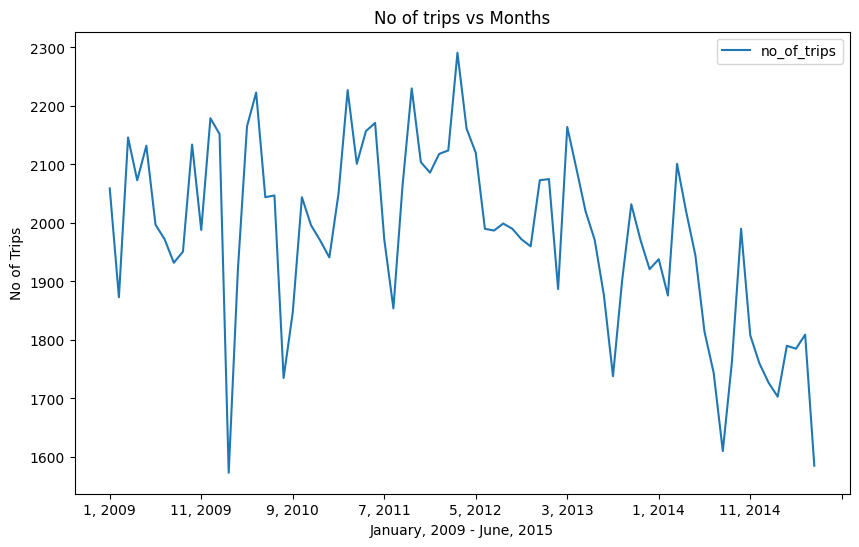

In [23]:
year_vs_trips.plot(figsize= (10,6),kind='line',x='month_year',y='no_of_trips', xlabel='January, 2009 - June, 2015',
    ylabel='No of Trips', title='No of trips vs Months')

## **Model Training**

In [21]:
import tensorflow as tf
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

In [22]:
uber_clean.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Day,Day of Week,Day of Week_num,Hour,counter,pickup,drop off
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.68,2015,5,7,Thu,3,19,1,"40.73835372924805,-73.99981689453125","40.72321701049805,-73.99951171875"
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.46,2009,7,17,Fri,4,20,1,"40.728225,-73.994355","40.750325,-73.99471"
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.66,2009,6,26,Fri,4,8,1,"40.790844,-73.976124","40.803349,-73.965316"
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.48,2014,8,28,Thu,3,17,1,"40.744085,-73.925023","40.761247,-73.97308199999999"
8,9.7,2012-02-17 09:32:00+00:00,-73.975187,40.745767,-74.002720,40.743537,1,2.33,2012,2,17,Fri,4,9,1,"40.745767,-73.975187","40.743537,-74.00272"


In [23]:
uber_clean.drop(['pickup_datetime', 'pickup', 'drop off', 'counter', 'Day of Week',
                 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude','dropoff_latitude', 'passenger_count'], axis=1, inplace=True)

In [24]:
uber_clean.head()

,fare_amount,Distance,Year,Month,Day,Day of Week_num,Hour
0,7.5,1.68,2015,5,7,3,19
1,7.7,2.46,2009,7,17,4,20
3,5.3,1.66,2009,6,26,4,8
4,16.0,4.48,2014,8,28,3,17
8,9.7,2.33,2012,2,17,4,9


In [26]:
uber_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154311 entries, 0 to 199998
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fare_amount      154311 non-null  float64
 1   Distance         154311 non-null  float64
 2   Year             154311 non-null  int64  
 3   Month            154311 non-null  int64  
 4   Day              154311 non-null  int64  
 5   Day of Week_num  154311 non-null  int64  
 6   Hour             154311 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 9.4 MB


In [27]:
uber_clean.reset_index(inplace=True)

In [28]:
uber_clean.drop(['index'], axis=1, inplace=True)

In [29]:
target_name = 'fare_amount'
feature_names = [column for column in uber_clean.columns if column != target_name]

In [30]:
# Seperate Test and Train set
X = uber_clean[feature_names]
y = uber_clean[[target_name]]

In [31]:
X

,Distance,Year,Month,Day,Day of Week_num,Hour
0,1.68,2015,5,7,3,19
1,2.46,2009,7,17,4,20
2,1.66,2009,6,26,4,8
3,4.48,2014,8,28,3,17
4,2.33,2012,2,17,4,9
...,...,...,...,...,...,...
154306,2.64,2012,9,29,5,19
154307,1.12,2014,1,31,4,14
154308,0.11,2012,10,28,6,10
154309,1.88,2014,3,14,4,1


In [32]:
X_norm = Normalizer().fit_transform(X)

### Test Train Split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, np.squeeze(y), test_size=0.2, random_state=42)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((123448, 6), (30863, 6), (123448,), (30863,))

C:\Users\Faizan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


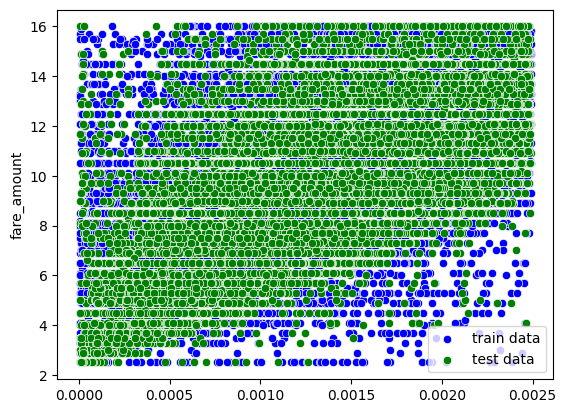

In [42]:
sns.scatterplot(x=X_train[:, 0], y=y_train, label='train data', color='blue')
sns.scatterplot(x=X_test[:, 0], y=y_test, label='test data', color='green')
plt.legend()
plt.show()

In [36]:
def reset_random_seeds(seed):
   os.environ['PYTHONHASHSEED']=str(seed)
   tf.random.set_seed(seed)
   tf.keras.utils.set_random_seed(seed)
   np.random.seed(seed)
   random.seed(seed)

In [38]:
i_shape = X_norm.shape[1]

In [42]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=3,
    restore_best_weights=True
)

## Neural Network Model

### Model 1

In [45]:
reset_random_seeds(42)
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(i_shape,), activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    tf.keras.layers.Dense(1, activation='relu')
])

In [46]:
model1.compile(loss=tf.keras.losses.Huber(delta=1.0),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['mean_squared_error', 'mean_absolute_error'])

In [47]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               700       
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


In [49]:
history = model1.fit(X_train, y_train, epochs=50, batch_size=150, callbacks=[early_stopping_callback])

Epoch 1/50
823/823 [==============================] - 11s 9ms/step - loss: 2.4816 - mean_squared_error: 14.7938 - mean_absolute_error: 2.9447
Epoch 2/50
823/823 [==============================] - 7s 8ms/step - loss: 1.8799 - mean_squared_error: 8.5920 - mean_absolute_error: 2.3373
Epoch 3/50
823/823 [==============================] - 7s 9ms/step - loss: 1.8752 - mean_squared_error: 8.5553 - mean_absolute_error: 2.3326
Epoch 4/50
823/823 [==============================] - 7s 8ms/step - loss: 1.8698 - mean_squared_error: 8.5167 - mean_absolute_error: 2.3272
Epoch 5/50
823/823 [==============================] - 7s 8ms/step - loss: 1.8631 - mean_squared_error: 8.4683 - mean_absolute_error: 2.3204
Epoch 6/50
823/823 [==============================] - 6s 8ms/step - loss: 1.8545 - mean_squared_error: 8.4130 - mean_absolute_error: 2.3114
Epoch 7/50
823/823 [==============================] - 6s 7ms/step - loss: 1.8435 - mean_squared_error: 8.3317 - mean_absolute_error: 2.3003
Epoch 8/50
823/823

In [ ]:
pd.DataFrame(history.history).plot()

In [100]:
model1.evaluate(X_test, y_test)

965/965 [==============================] - 4s 4ms/step - loss: 0.9423 - mean_squared_error: 3.5486 - mean_absolute_error: 1.3552


[0.9423270225524902, 3.548583507537842, 1.3552415370941162]

In [ ]:
y_pred = model1.predict(X_test)

fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Plot the first scatter plot on the first subplot
sns.scatterplot(x=X_test[:, 0], y=np.squeeze(y_pred), label='Predicted', color='red', ax=axes[0])
axes[0].set_title('Predicted')

# Plot the second scatter plot on the second subplot
sns.scatterplot(x=X_test[:,0], y=y_test, label='Actual', color='green', ax=axes[1])
axes[1].set_title('Actual')

sns.scatterplot(x=X_test[:,0], y=np.squeeze(y_pred), label='Predicted', color='red', ax=axes[2])
sns.scatterplot(x=X_test[:,0], y=y_test, label='Actual', color='green', ax=axes[2])
axes[2].set_title('Predicted v Actual')


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### Model 2

In [84]:
reset_random_seeds(42)
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(40, input_shape=(1,), activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

In [85]:
model2.compile(loss='mean_squared_error',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['mean_squared_error', 'mean_absolute_error'])

#keras.losses.Huber(delta=1.0),

In [86]:
history = model2.fit(X_train, y_train, epochs=50, batch_size=100, callbacks=[early_stopping_callback])

Epoch 1/50
1235/1235 [==============================] - 7s 5ms/step - loss: 10.2409 - mean_squared_error: 10.2409 - mean_absolute_error: 2.5208
Epoch 2/50
1235/1235 [==============================] - 6s 5ms/step - loss: 3.9477 - mean_squared_error: 3.9477 - mean_absolute_error: 1.5036
Epoch 3/50
1235/1235 [==============================] - 7s 5ms/step - loss: 3.8087 - mean_squared_error: 3.8087 - mean_absolute_error: 1.4695
Epoch 4/50
1235/1235 [==============================] - 6s 5ms/step - loss: 3.7764 - mean_squared_error: 3.7764 - mean_absolute_error: 1.4639
Epoch 5/50
1235/1235 [==============================] - 6s 5ms/step - loss: 3.7205 - mean_squared_error: 3.7205 - mean_absolute_error: 1.4523
Epoch 6/50
1235/1235 [==============================] - 6s 5ms/step - loss: 3.6882 - mean_squared_error: 3.6882 - mean_absolute_error: 1.4461
Epoch 7/50
1235/1235 [==============================] - 6s 5ms/step - loss: 3.6906 - mean_squared_error: 3.6906 - mean_absolute_error: 1.4501
Epoc

<Axes: >

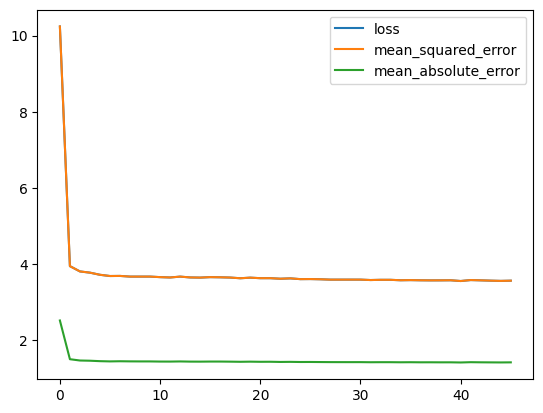

In [87]:
pd.DataFrame(history.history).plot()

In [215]:
model2.evaluate(X_test, y_test)

965/965 [==============================] - 2s 2ms/step - loss: 3.5200 - mean_squared_error: 3.5200 - mean_absolute_error: 1.3679


[3.5199902057647705, 3.5199902057647705, 1.3679391145706177]

965/965 [==============================] - 2s 2ms/step


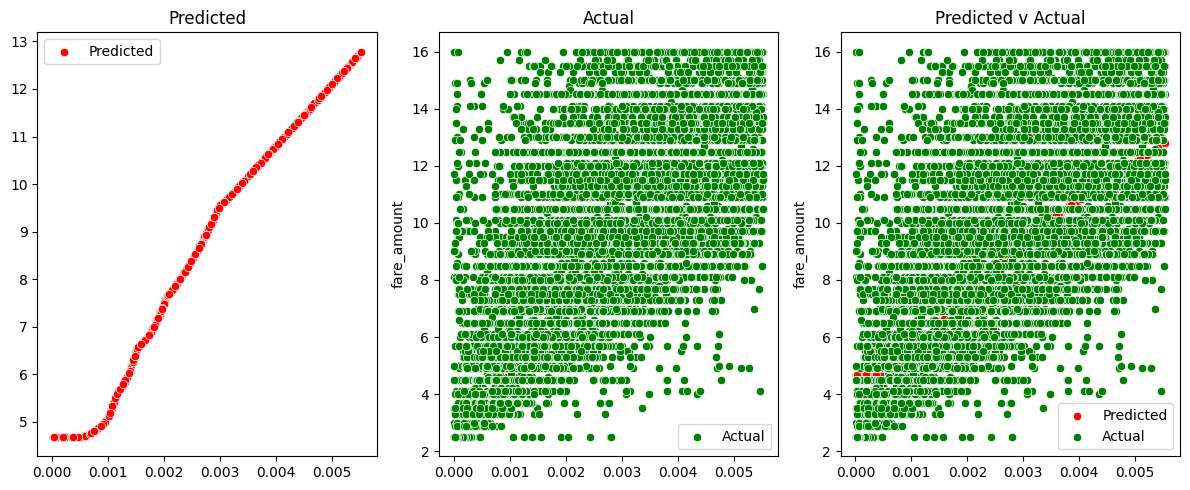

In [89]:
y_pred = model2.predict(X_test)
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Plot the first scatter plot on the first subplot
sns.scatterplot(x=X_test[:], y=np.squeeze(y_pred), label='Predicted', color='red', ax=axes[0])
axes[0].set_title('Predicted')

# Plot the second scatter plot on the second subplot
sns.scatterplot(x=X_test[:], y=y_test, label='Actual', color='green', ax=axes[1])
axes[1].set_title('Actual')

sns.scatterplot(x=X_test[:], y=np.squeeze(y_pred), label='Predicted', color='red', ax=axes[2])
sns.scatterplot(x=X_test[:], y=y_test, label='Actual', color='green', ax=axes[2])
axes[2].set_title('Predicted v Actual')


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### Model 3

In [83]:
reset_random_seeds(42)
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(5000, input_shape=(i_shape,), activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    #tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(5000, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    # tf.keras.layers.Dropout(0.1),
    # tf.keras.layers.Dense(1500, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    # tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(1, activation=tf.keras.layers.LeakyReLU(alpha=0.01))
])

model3.compile(loss=tf.keras.losses.Huber(delta=0.2),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['mean_squared_error', 'mean_absolute_error'])



#tf.keras.losses.Huber(delta=1.0)
history = model3.fit(X_train, y_train, epochs=50, batch_size=800,  callbacks=[early_stopping_callback])

Epoch 1/50
155/155 [==============================] - 4s 23ms/step - loss: 0.4733 - mean_squared_error: 9.8025 - mean_absolute_error: 2.4650
Epoch 2/50
155/155 [==============================] - 3s 21ms/step - loss: 0.4427 - mean_squared_error: 8.4354 - mean_absolute_error: 2.3120
Epoch 3/50
155/155 [==============================] - 3s 21ms/step - loss: 0.4075 - mean_squared_error: 7.3259 - mean_absolute_error: 2.1356
Epoch 4/50
155/155 [==============================] - 3s 21ms/step - loss: 0.3535 - mean_squared_error: 5.8373 - mean_absolute_error: 1.8651
Epoch 5/50
155/155 [==============================] - 3s 21ms/step - loss: 0.2982 - mean_squared_error: 4.4572 - mean_absolute_error: 1.5880
Epoch 6/50
155/155 [==============================] - 3s 21ms/step - loss: 0.2708 - mean_squared_error: 3.9102 - mean_absolute_error: 1.4507
Epoch 7/50
155/155 [==============================] - 3s 21ms/step - loss: 0.2642 - mean_squared_error: 3.8073 - mean_absolute_error: 1.4178
Epoch 8/50
15

<Axes: >

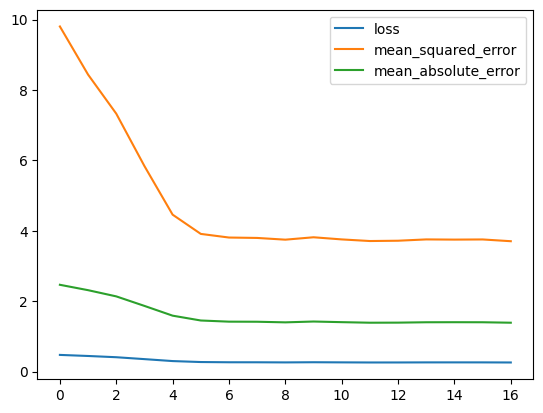

In [84]:
pd.DataFrame(history.history).plot()

In [81]:
model3.evaluate(X_test, y_test)

965/965 [==============================] - 6s 6ms/step - loss: 0.2551 - mean_squared_error: 3.8218 - mean_absolute_error: 1.3717


[0.25512945652008057, 3.821755886077881, 1.3716506958007812]

965/965 [==============================] - 2s 2ms/step


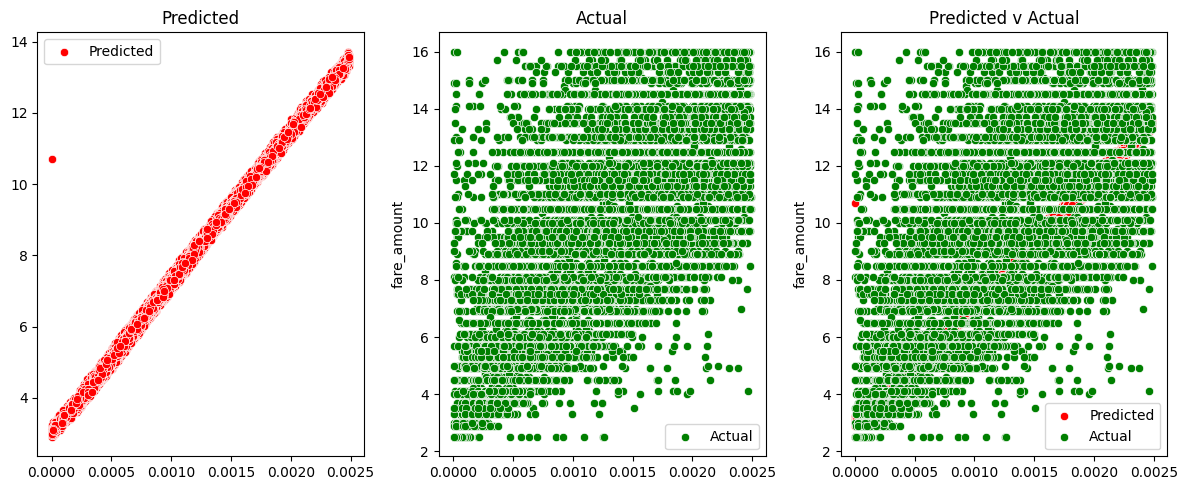

In [82]:
y_pred = model3.predict(X_test)
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Plot the first scatter plot on the first subplot
sns.scatterplot(x=X_test[:, 1], y=np.squeeze(y_pred), label='Predicted', color='red', ax=axes[0])
axes[0].set_title('Predicted')

# Plot the second scatter plot on the second subplot
sns.scatterplot(x=X_test[:,1], y=y_test, label='Actual', color='green', ax=axes[1])
axes[1].set_title('Actual')

sns.scatterplot(x=X_test[:,1], y=np.squeeze(y_pred), label='Predicted', color='red', ax=axes[2])
sns.scatterplot(x=X_test[:,1], y=y_test, label='Actual', color='green', ax=axes[2])
axes[2].set_title('Predicted v Actual')


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## Using K-Fold

In [39]:
reset_random_seeds(42)
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, input_shape=(i_shape,), activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    #tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1000, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1000, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    # tf.keras.layers.Dropout(0.2),
    # tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model4.compile(loss=tf.keras.losses.Huber(delta=0.2),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
               metrics=['mean_squared_error', 'mean_absolute_error'])

In [40]:
X_d = pd.DataFrame(X_train)
y_d = pd.DataFrame(y_train)

Training on training set...
Epoch 1/50
659/659 [==============================] - 8s 7ms/step - loss: 0.4323 - mean_squared_error: 8.2659 - mean_absolute_error: 2.2597
Epoch 2/50
659/659 [==============================] - 5s 7ms/step - loss: 0.2927 - mean_squared_error: 4.3701 - mean_absolute_error: 1.5606
Epoch 3/50
659/659 [==============================] - 5s 7ms/step - loss: 0.2726 - mean_squared_error: 3.9733 - mean_absolute_error: 1.4598
Epoch 4/50
659/659 [==============================] - 5s 7ms/step - loss: 0.2702 - mean_squared_error: 3.9298 - mean_absolute_error: 1.4477
Epoch 5/50
659/659 [==============================] - 4s 7ms/step - loss: 0.2688 - mean_squared_error: 3.9024 - mean_absolute_error: 1.4408
Epoch 6/50
659/659 [==============================] - 4s 7ms/step - loss: 0.2687 - mean_squared_error: 3.8892 - mean_absolute_error: 1.4402
Epoch 7/50
659/659 [==============================] - 5s 7ms/step - loss: 0.2678 - mean_squared_error: 3.8672 - mean_absolute_error:

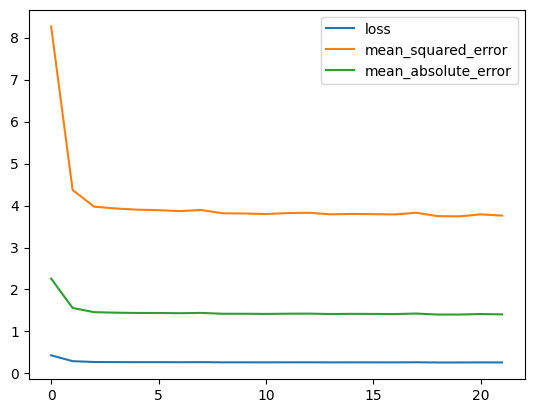

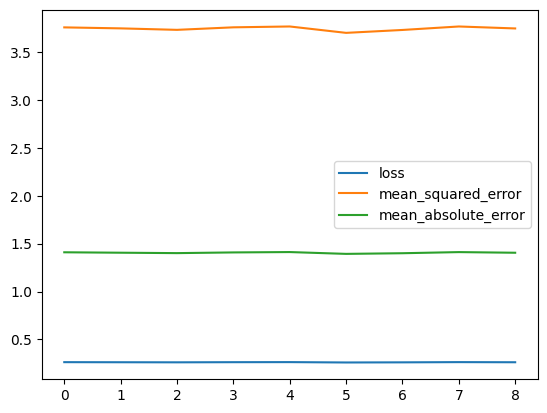

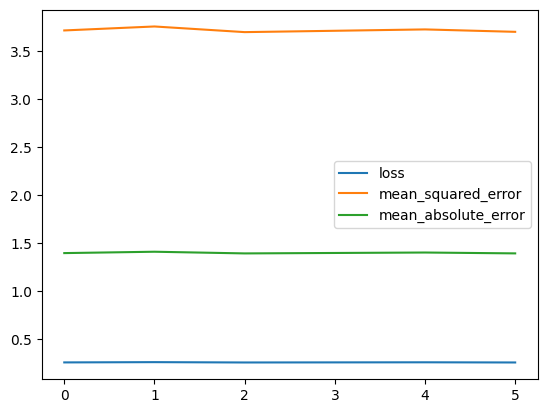

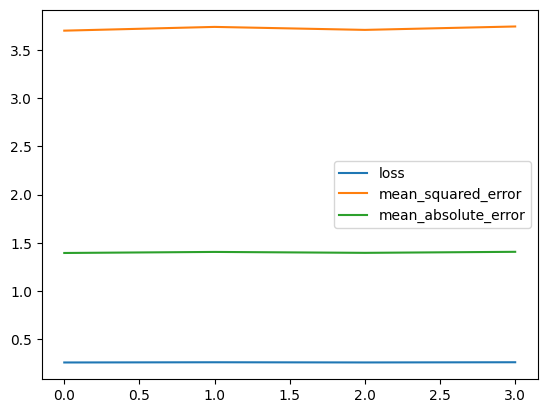

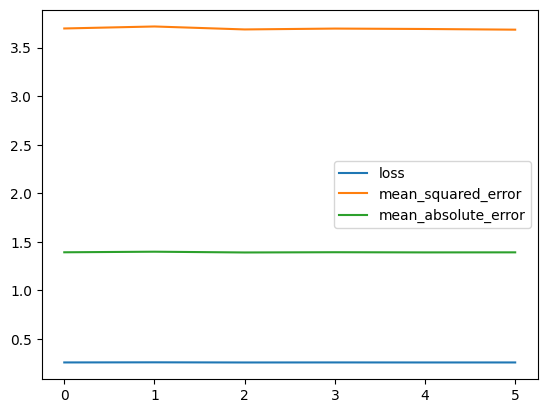

In [43]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
histories = []
# Iterate through each fold
for train_idx, val_idx in kfold.split(X_train):
     # Split data into train and validation sets
    print("Training on training set...")
    X_temp, X_val = X_d.iloc[train_idx], X_d.iloc[val_idx]
    y_temp, y_val = y_d.iloc[train_idx], y_d.iloc[val_idx]
    
    history = model4.fit(X_temp, y_temp, epochs=50, batch_size=150,  callbacks=[early_stopping_callback])
    pd.DataFrame(history.history).plot()
    histories.append(history)
    print("Evaluating on validation set...")
    model4.evaluate(X_val, y_val)
    print()
    
    #print("Train indices:", train_idx)
    #print("Validation indices:", val_idx)
    #print()

Evaluating on test set...
965/965 [==============================] - 2s 2ms/step


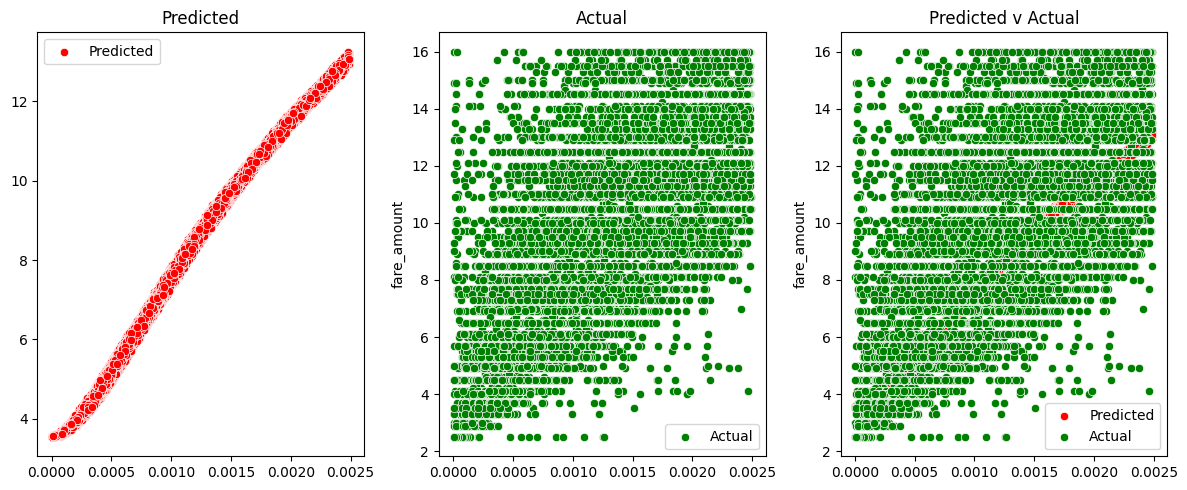

In [45]:
print("Evaluating on test set...")
model4.evaluate(X_test, y_test)
y_pred = model4.predict(X_test)
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Plot the first scatter plot on the first subplot
sns.scatterplot(x=X_test[:, 0], y=np.squeeze(y_pred), label='Predicted', color='red', ax=axes[0])
axes[0].set_title('Predicted')

# Plot the second scatter plot on the second subplot
sns.scatterplot(x=X_test[:,0], y=y_test, label='Actual', color='green', ax=axes[1])
axes[1].set_title('Actual')

sns.scatterplot(x=X_test[:,0], y=np.squeeze(y_pred), label='Predicted', color='red', ax=axes[2])
sns.scatterplot(x=X_test[:,0], y=y_test, label='Actual', color='green', ax=axes[2])
axes[2].set_title('Predicted v Actual')


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()